# Student Performance Indicator

### LIfe Cycle of a Machine Learning Project

* Understanding the Problem Statement
* Data Collection 
* Data Validation
* Exploratory Data Analysis 
* Data Pre-Processing
* Model Training
* Choose Best Model

## 1.) Problem Statement

* This project understands how the student's performance (test scores) is affected by the other variables such as Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

## 2.) Data Collection

* Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of * columns and 1000 rows. 

## 2.1) Import Data and Required Packages

In [2]:
#Import Dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Extract CSV Data into Pandas Dataframe

In [3]:
#Create Student Performance Dataframe
sp_df = pd.read_csv('data/stud.csv')

#View Dataframe 
sp_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#View Dataframe Shape
sp_df.shape

(1000, 8)

## 2.2) Dataset Information 

* gender: Sex of Student -> (male/female)
* race_ethnicity: Ethnicity of the Student -> (Group A, B, C, D, E)
* parental_level_of_education: Parent's highest education completed -> (master's degree, bachelor's degree, associate's degree, some college, high school)
* lunch: Type of lunch -> (standard, free/reduced)
* test_preparation_course: supplemental material completion -> (completed, none)
* math_score
* reading_score
* writing_score  

## 3.) Data Validation

* Check missing values
* Check duplicates
* Check data types
* Check the number of unique values in each column
* Check statistics of the dataset
* Check various categories present in the columns 

## 3.1.) Check for Missing Values

In [5]:
#Count the amount of missing values
sp_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* There are no missing values in the dataset

## 3.2.) Check for Duplicate Values

In [6]:
#Count the amount of duplicate values
sp_df.duplicated().sum()

0

* There are no duplicate values in the dataset

## 3.3.) Check Data Types

In [7]:
#Check for null values, and the data types in the dataset
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* There are no null values in the dataset

## 3.4.) Check the number of Unique Values in the Dataset's columns

In [8]:
#Check dataset for unique values
sp_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5.) Check the Statistics of the Dataset

In [9]:
#Check basic stats of the dataset
sp_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights

* From the description above of the numerical data, all means are very similar - between 65 and 68.05;
* All standard deviations are also very similar - between 14.6 and 15.19;
* While there is a minimum score of 0 for the math portion of the exam, the minimum socre for the writing portion is 10, and 17 for the reading portion of the exam

## 3.6) Exploring the Data

In [10]:
#View gender categories in the dataset
print("Categories in 'gender' variables:    ", end = " ")
print(sp_df['gender'].unique())

#View race categories in the dataset
print("Categories in 'race_ethnicity' variables:    ", end = " ")
print(sp_df['race_ethnicity'].unique())

#View parental education categories in the dataset
print("Categories in 'parental_level_of_education' variables:    ", end = " ")
print(sp_df['parental_level_of_education'].unique())

#View lunch categories in the dataset
print("Categories in 'lunch' variables:    ", end = " ")
print(sp_df['lunch'].unique())

#View test prep categories in the dataset
print("Categories in 'test_preparation_course' variables:    ", end = " ")
print(sp_df['test_preparation_course'].unique())

Categories in 'gender' variables:     ['female' 'male']
Categories in 'race_ethnicity' variables:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' variables:     ['none' 'completed']


In [11]:
#Define numerical and Categorical columns in dataset
numeric_features = [feature for feature in sp_df.columns if sp_df[feature].dtype != 'O']
categorical_features = [feature for feature in sp_df.columns if sp_df[feature].dtype == 'O']

#View numerical and categorical columns in dataset
print("There are {} numerical features: {}".format(len(numeric_features), numeric_features))
print("There are {} categorical features: {}".format(len(categorical_features), categorical_features))

There are 3 numerical features: ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.7.) Creating Total score and Average Columns

In [12]:
#Create total score column
sp_df['total_score'] = sp_df['math_score'] + sp_df['reading_score'] + sp_df['writing_score']

#Create average column
sp_df['average'] = sp_df['total_score'] / 3

#View updated dataframe 
sp_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 3.8.) Explore test statistics

In [13]:
#Check the amount of students who recieved perfect test scores
math_perf = sp_df[sp_df['math_score'] == 100]['average'].count()
reading_perf = sp_df[sp_df['reading_score'] == 100]['average'].count()
writing_perf = sp_df[sp_df['writing_score'] == 100]['average'].count()

#View the amount of Students who recieved perfect test scores
print(f'Number of Students with perfect scores in math: {math_perf}')
print(f'Number of Students with perfect scores in reading: {reading_perf}')
print(f'Number of Students with perfect scores in writing: {writing_perf}')

Number of Students with perfect scores in math: 7
Number of Students with perfect scores in reading: 17
Number of Students with perfect scores in writing: 14


In [14]:
#Check the amount of students who recieved 20 or less on test scores
math_20 = sp_df[sp_df['math_score'] <= 20]['average'].count()
reading_20 = sp_df[sp_df['reading_score'] <= 20]['average'].count()
writing_20 = sp_df[sp_df['writing_score'] <= 20]['average'].count()

#View the amount of students who recieved 20 or less on test scores
print(f'Number of Students with math scores of 20 or less: {math_20}')
print(f'Numner of students with reading scores of 20 or less: {reading_20}')
print(f'Number of Students with writing scores of 20 or less: {writing_20}')

Number of Students with math scores of 20 or less: 4
Numner of students with reading scores of 20 or less: 1
Number of Students with writing scores of 20 or less: 3


## Insights

* From the values above we can conclude that students performed worse in math than in reading, and writing;
* We can also conclude that the best performance was seen in the reading portion of the exam

## 4.) Data Visualization 

## 4.1.) Visualize Average Score Distribution to Draw Conclusions 

* Create a Histogram 
* Create Kernel Distribution Function (KDE)

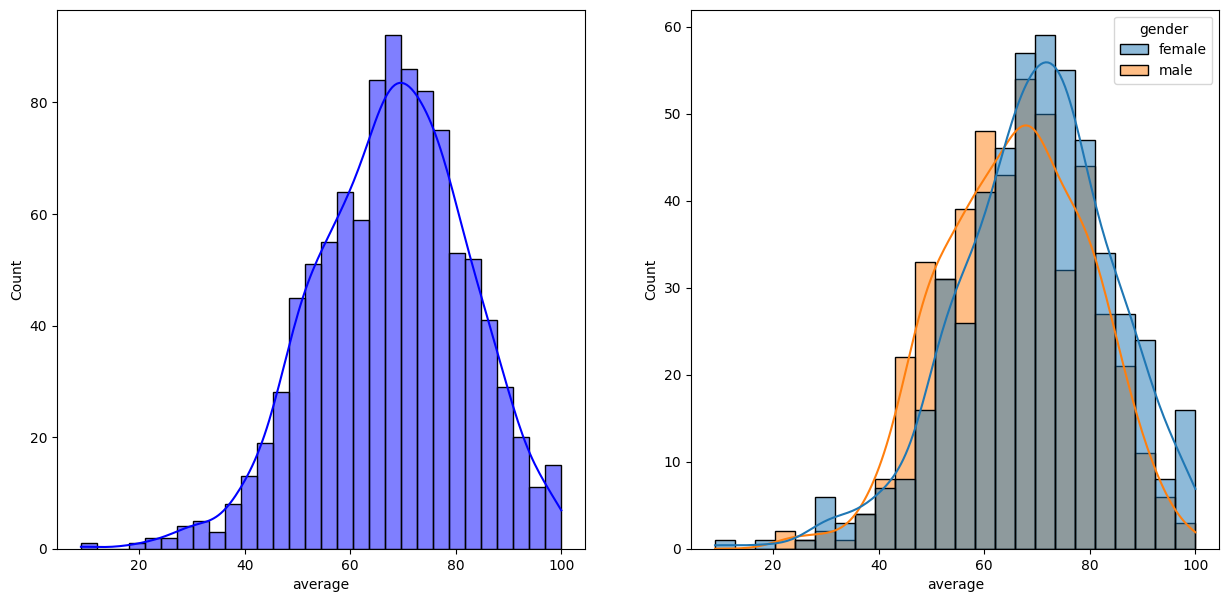

In [15]:
#Create histogram visualization about the exams average score
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = sp_df, x = 'average', bins = 30, kde = True, color = 'b')
plt.subplot(122)
sns.histplot(data = sp_df, x = 'average', kde = True, hue = 'gender')
plt.show()

## Insights

* From the histograms above we can conclude that female students performed significantly better than the male students in the exam.

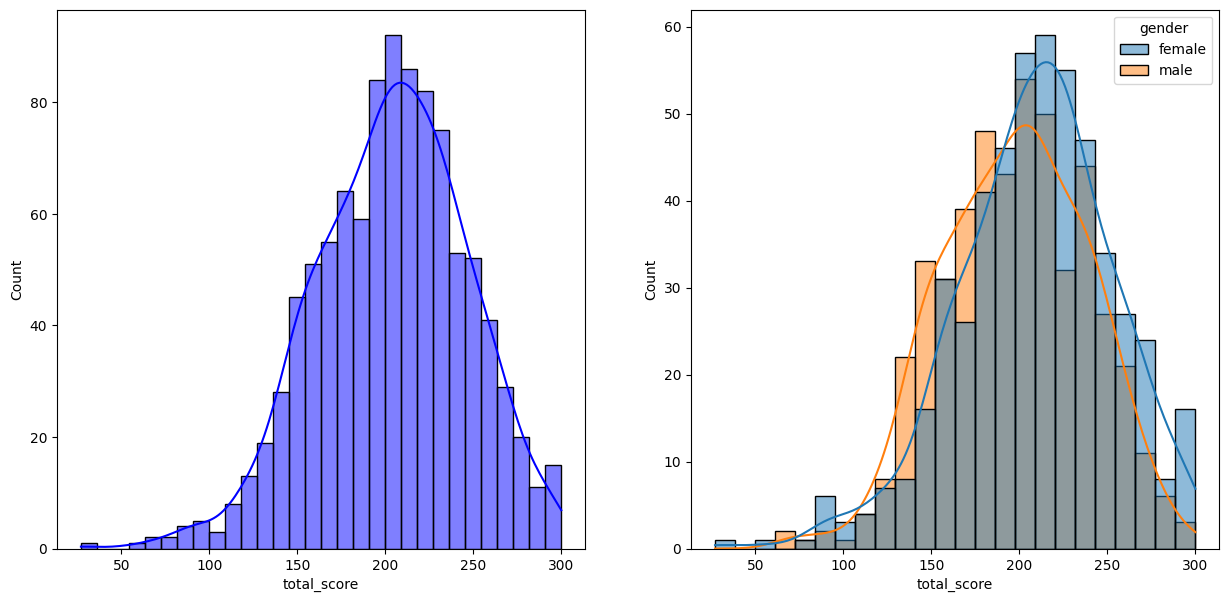

In [16]:
#Create histogram visualization about the exams average score
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = sp_df, x = 'total_score', bins = 30, kde = True, color = 'b')
plt.subplot(122)
sns.histplot(data = sp_df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

## Insights

* After plotting the total scores as well we can see that the female students out performed the male students in the exam.

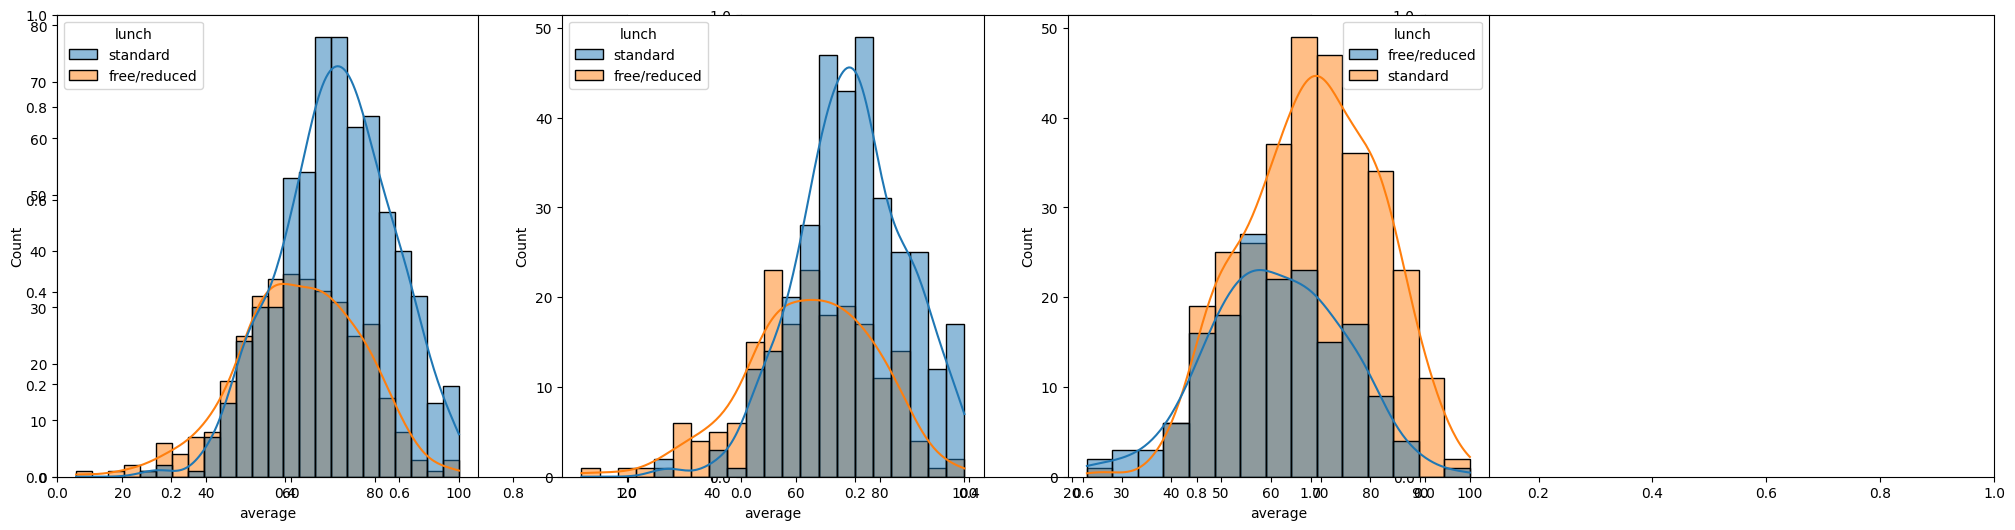

In [17]:
#Plot the effects lunch had on the average score 
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = sp_df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = sp_df[sp_df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = sp_df[sp_df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

## Insights

* from the histograms above we can see that students who recieve standard lunch regardless of sex perform better in the exams.

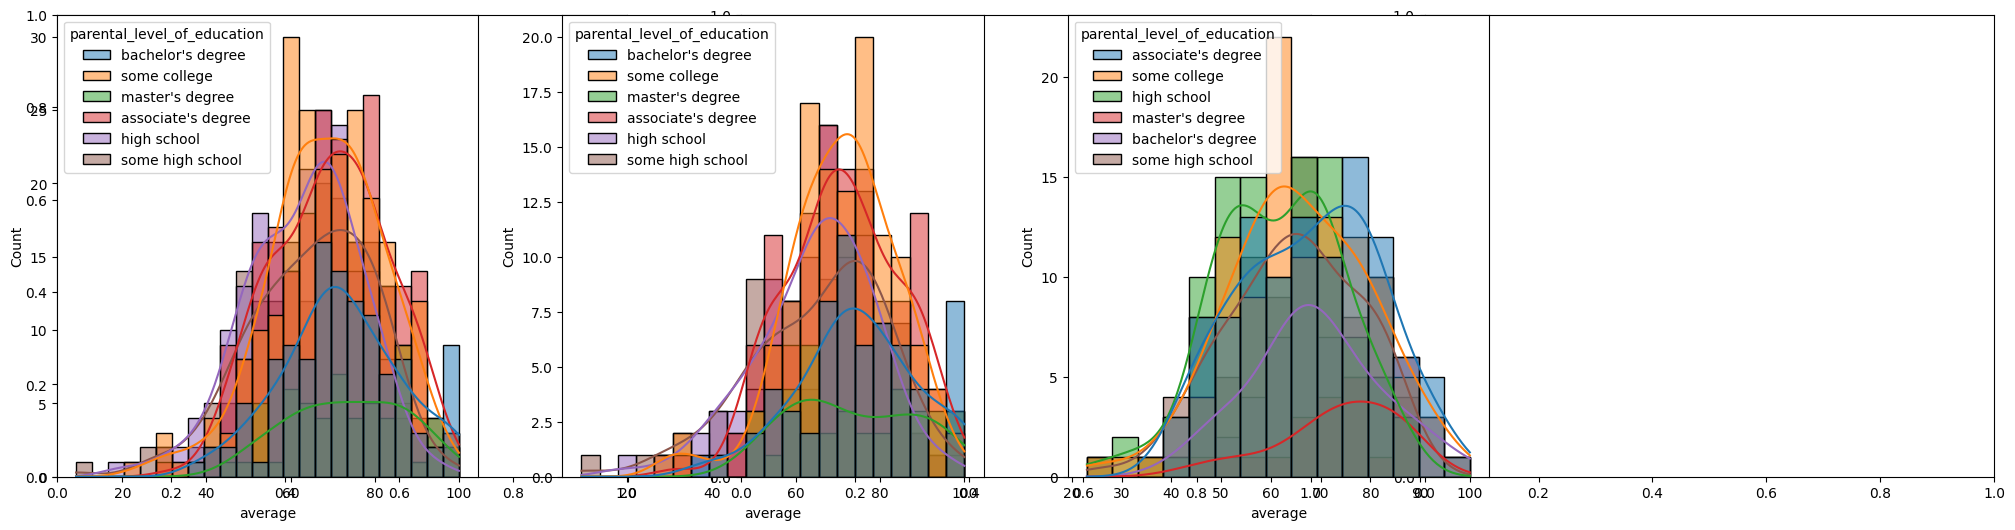

In [20]:
#Plot the effect parental education had on exams scores
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax =sns.histplot(data = sp_df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data = sp_df[sp_df.gender == 'female'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data = sp_df[sp_df.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.show()

## Insights

* Overall we can't really conclude that parents education has any effect on students exam scores;
* Although in the third plot we can see that male students have performed better on the exam if their parents have some college experience, an associate's or bachelor's degree;
* In the second plot we can see that the parents level of education has no effect on female students exam scores. 

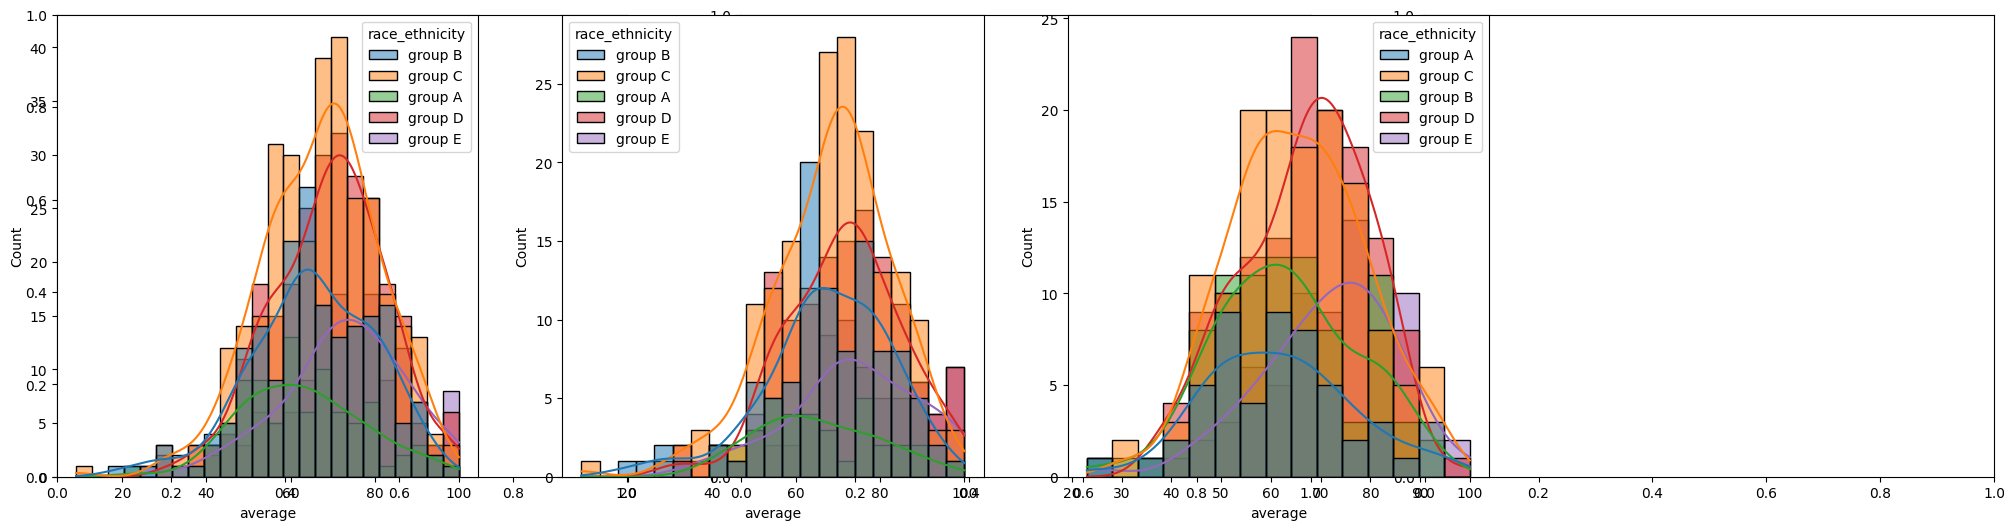

In [22]:
#Plot the effects race/ethnicity had on exam scores
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax =sns.histplot(data = sp_df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data = sp_df[sp_df.gender == 'female'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data = sp_df[sp_df.gender == 'male'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.show()

## Insights

* We can see that on average groups A and B scored lower than all other groups;
* Amongst female students you can see that groups D and E performed best;
* Amongst male students you can see that groups C and E performed best.

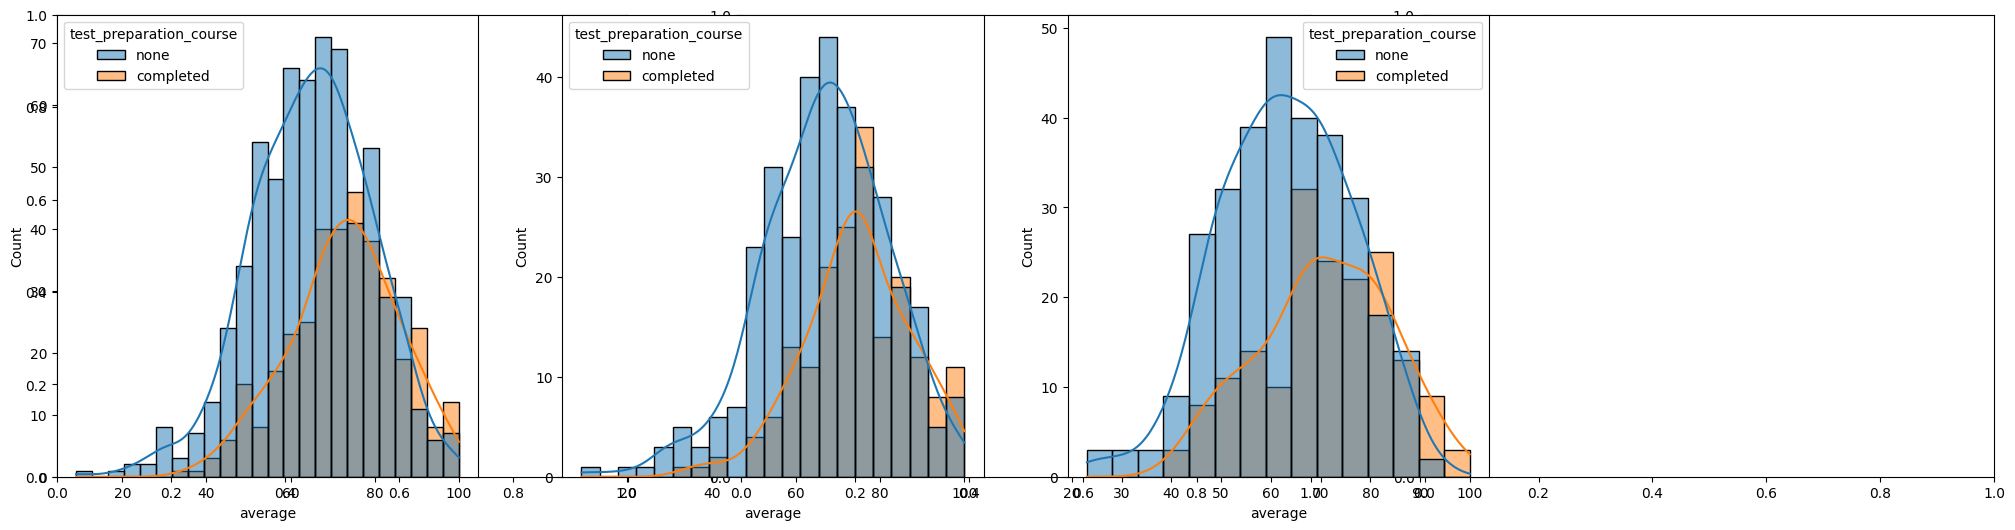

In [23]:
#Plot the effects race/ethnicity had on exam scores
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
ax =sns.histplot(data = sp_df, x = 'average', kde = True, hue = 'test_preparation_course')
plt.subplot(142)
ax =sns.histplot(data = sp_df[sp_df.gender == 'female'], x = 'average', kde = True, hue = 'test_preparation_course')
plt.subplot(143)
ax =sns.histplot(data = sp_df[sp_df.gender == 'male'], x = 'average', kde = True, hue = 'test_preparation_course')
plt.show()

## Insights

* Overall we can see that the test preparation course has helped students score in the upper percentile;
* We can see that the test preparation course helped male students score in the upper percentile while female students were still scoring in the upper percentile without the test preparation course. 

## 4.2.) Visualize Maximum Scores of all Students in all Categories

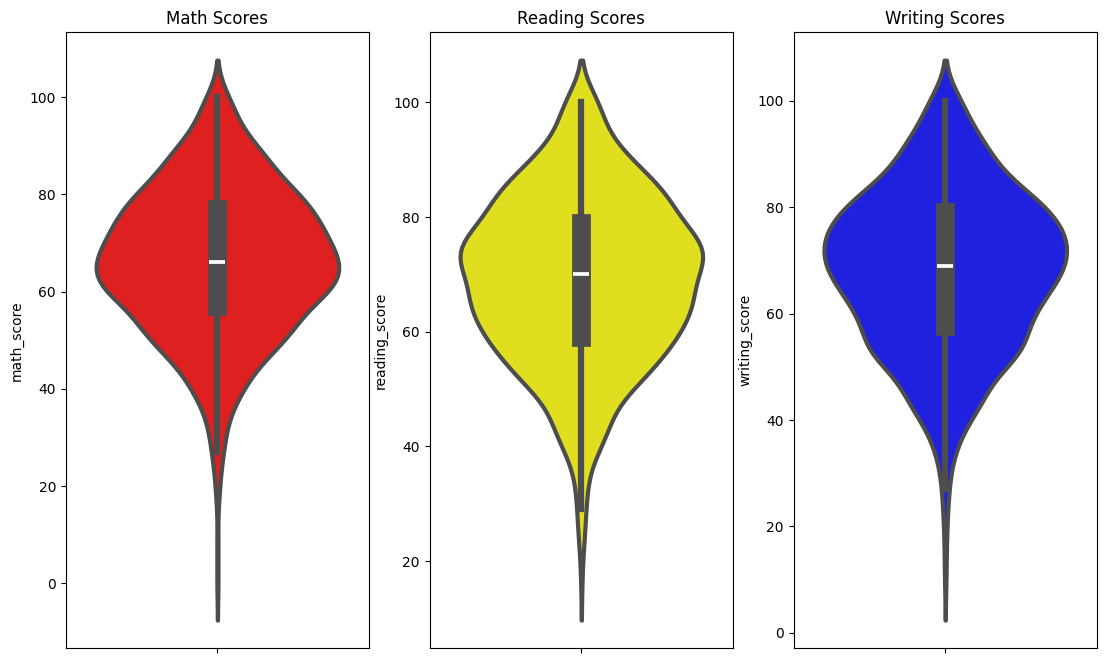

In [25]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y = 'math_score', data = sp_df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading_score', data = sp_df, color = 'yellow', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y = 'writing_score', data = sp_df, color = 'blue', linewidth = 3)
plt.show()

## Insights

* From the plots we can see that overall students scored higher in math with majority of the scores being within the 60 - 80 percentile, compared to reading and writing scores being within the 50 - 70 percentile.